# Handwriting Classification using MNIST

## Loading the data

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255 #Normalisation 

In [45]:
print('training data: ', x_train.shape)
print('testing data: ', x_test.shape)

training data:  (60000, 28, 28)
testing data:  (10000, 28, 28)


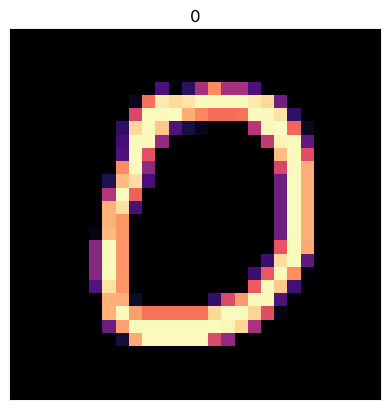

In [3]:
plt.imshow(x_test[10], cmap = 'magma')
plt.title(y_test[10])
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 

## Model creation

In [48]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\Chirag Chetan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# model = tf.keras.models.Sequential(
#     [tf.keras.layers.Flatten(input_shape = (28, 28)),
#     tf.keras.layers.Dense(98, activation='relu'),
#     tf.keras.layers.Dense(10)]
# )
# model.summary()

In [50]:
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# metric = ['accuracy']
# optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

# model.compile(loss=loss, metrics=metric, optimizer=optimiser)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# print('Model compiled')

## Model Training

In [51]:
# epochs = 5
# batch = 50
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6, shuffle = True)
# history = model.fit(x_train, y_train, 
#                     batch_size=batch, 
#                     epochs=epochs, 
#                     shuffle=True, 
#                     verbose=1)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8823 - loss: 0.4200 - val_accuracy: 0.9594 - val_loss: 0.1342
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9670 - loss: 0.1134 - val_accuracy: 0.9714 - val_loss: 0.0939
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0750 - val_accuracy: 0.9740 - val_loss: 0.0836
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0549 - val_accuracy: 0.9763 - val_loss: 0.0748
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0413 - val_accuracy: 0.9768 - val_loss: 0.0738
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9896 - loss: 0.0326 - val_accuracy: 0.9768 - val_loss: 0.0760


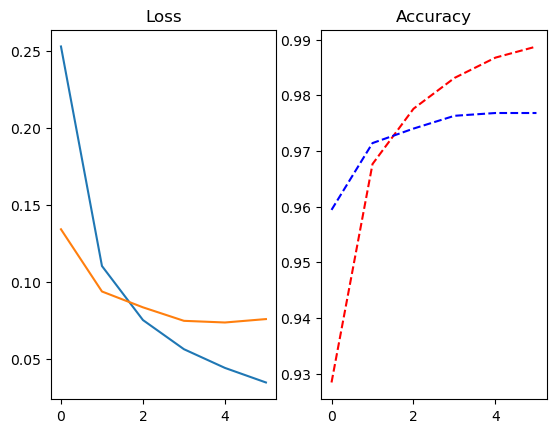

In [52]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].title.set_text('Loss')

ax[1].plot(history.history['accuracy'], 'r--')
ax[1].plot(history.history['val_accuracy'], 'b--')
ax[1].title.set_text('Accuracy')

## Model Testing

97% accuracy on the test data

In [53]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Loss')
print(loss)
print('Accuracy')
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0915
Loss
0.07596495747566223
Accuracy
0.9768000245094299


In [55]:
start = 100
end = 150

predictions = model.predict(x_test[start:end])

for i in range(len(predictions)):
    print(f'predicted value is {np.argmax(predictions[i])} and actual val is {y_test[i+start]}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
predicted value is 6 and actual val is 6
predicted value is 0 and actual val is 0
predicted value is 5 and actual val is 5
predicted value is 4 and actual val is 4
predicted value is 9 and actual val is 9
predicted value is 9 and actual val is 9
predicted value is 2 and actual val is 2
predicted value is 1 and actual val is 1
predicted value is 9 and actual val is 9
predicted value is 4 and actual val is 4
predicted value is 8 and actual val is 8
predicted value is 7 and actual val is 7
predicted value is 3 and actual val is 3
predicted value is 9 and actual val is 9
predicted value is 7 and actual val is 7
predicted value is 9 and actual val is 4
predicted value is 4 and actual val is 4
predicted value is 4 and actual val is 4
predicted value is 9 and actual val is 9
predicted value is 2 and actual val is 2
predicted value is 5 and actual val is 5
predicted value is 4 and actual val is 4
predicted value is 7 and actual val is 7
predicted value is 

## Visualization

In [13]:
import gradio as gr
import cv2

In [63]:
def classify(image):
    image = image['layers'][0]
    print('original',image.shape)
    
    image = cv2.resize(image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    image = image[:,:,3]  / 255
    image = np.expand_dims(image, 0)
    
    prediction = model.predict(image)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

# height=28, width=28
sketchpad = gr.Sketchpad()
label = gr.Label(num_top_classes=10)
interface = gr.Interface(classify, sketchpad, label, live=True, theme=gr.themes.Monochrome())
interface.launch();

Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
original (600, 800, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
original 

In [58]:
model.predict(np.expand_dims(x_test[0], 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[2.8730822e-09, 1.6452111e-10, 3.0991224e-08, 4.1529918e-05,
        4.5444755e-12, 1.6113065e-08, 3.2387982e-14, 9.9995852e-01,
        8.6105656e-09, 3.6841058e-08]], dtype=float32)